# AI Enabled Mental Health Tracker

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# EDA (Exploratory Data Analysis)

Load and Prepare the data

In [2]:
#Creating the dataframes
dis=pd.read_csv("mental-and-substance-use-as-share-of-disease -AI.csv")
diso=pd.read_csv("prevalence-by-mental-and-substance-use-disorder _AI.csv")

In [3]:
dis.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                                           1.791189                                                
3                                           1.776779                                                
4                                           1.712986

In [4]:
diso.head(10)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   
5  Afghanistan  AFG  1995   
6  Afghanistan  AFG  1996   
7  Afghanistan  AFG  1997   
8  Afghanistan  AFG  1998   
9  Afghanistan  AFG  1999   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          
5                                           0.224713                          
6                                           0.223690                          
7                                           0.222424                          
8                                           0.221129                          
9                                           0.220065                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             
5                                           0.716686                             
6                                           0.716388                             
7                                           0.716143                             
8                                           0.716139                             
9                                           0.716323                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             
5                                           0.111129                             
6                                           0.107786                             
7                                           0.103931                             
8                                           0.100343                             
9                                           0.097946                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              
5                                           4.780851                              
6                                           4.777272                              
7                                           4.775242                              
8                                           4.777377                              
9                                           4.782067                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0             

In [5]:
#Merging the both datasets
df=pd.merge(diso,dis)
df.head(10)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   
5  Afghanistan  AFG  1995   
6  Afghanistan  AFG  1996   
7  Afghanistan  AFG  1997   
8  Afghanistan  AFG  1998   
9  Afghanistan  AFG  1999   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          
5                                           0.224713                          
6                                           0.223690                          
7                                           0.222424                          
8                                           0.221129                          
9                                           0.220065                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             
5                                           0.716686                             
6                                           0.716388                             
7                                           0.716143                             
8                                           0.716139                             
9                                           0.716323                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             
5                                           0.111129                             
6                                           0.107786                             
7                                           0.103931                             
8                                           0.100343                             
9                                           0.097946                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              
5                                           4.780851                              
6                                           4.777272                              
7                                           4.775242                              
8                                           4.777377                              
9                                           4.782067                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0             

Data Cleaning

In [6]:
#Finding the Missing values in the dataset
df.isna().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

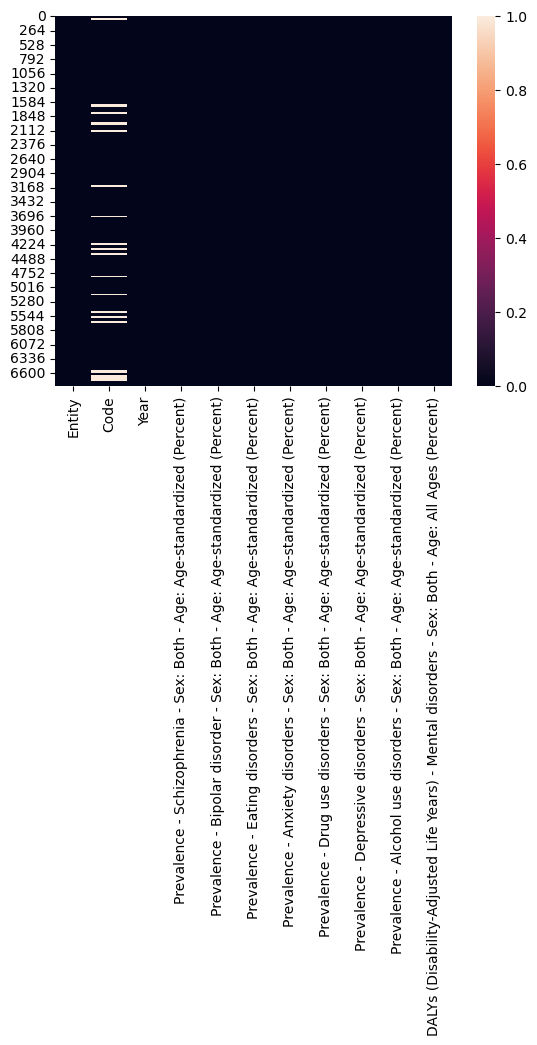

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
#Drop the column of "Code" because it's not necessary for the Data Training 
df.drop('Code', axis=1, inplace=True)

In [9]:
#View the updated dataset 
df

Entity  Year  \
0     Afghanistan  1990   
1     Afghanistan  1991   
2     Afghanistan  1992   
3     Afghanistan  1993   
4     Afghanistan  1994   
...           ...   ...   
6835     Zimbabwe  2015   
6836     Zimbabwe  2016   
6837     Zimbabwe  2017   
6838     Zimbabwe  2018   
6839     Zimbabwe  2019   

      Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                              0.228979                          
1                                              0.228120                          
2                                              0.227328                          
3                                              0.226468                          
4                                              0.225567                          
...                                                 ...                          
6835                                           0.209359                          
6836                                           0.209979                          
6837                                           0.210631                          
6838                                           0.211237                          
6839                                           0.211969                          

      Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                              0.721207                             
1                                              0.719952                             
2                                              0.718418                             
3                                              0.717452                             
4                                              0.717012                             
...                                                 ...                             
6835                                           0.560882                             
6836                                           0.561768                             
6837                                           0.562612                             
6838                                           0.563283                             
6839                                           0.563820                             

      Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                              0.131001                             
1                                              0.126395                             
2                                              0.121832                             
3                                              0.117942                             
4                                              0.114547                             
...                                                 ...                             
6835                                           0.099610                             
6836                                           0.100821                             
6837                                           0.101671                             
6838                                           0.102398                             
6839                                           0.102902                             

      Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                              4.835127                              
1                                              4.821765                              
2                                              4.801434                              
3                                              4.789363                              
4                                              4.784923                              
...                                                 ...                              
6835                                           3.315701  

In [10]:
#Checking the shape and size of the updated dataset
print("Shape of the dataset(array dimension (rows,columns) : ", df.shape)
print("The size of dataset(size=rows*columns) : ", df.size)

Shape of the dataset(array dimension (rows,columns) :  (6840, 10)
The size of dataset(size=rows*columns) :  68400


In [11]:
df.columns

Index(['Entity', 'Year',
       'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'],
      dtype='object')

In [12]:
df=df.set_axis(['Country','Year','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','Drug_use','Depression','Alcohol_use','Mental_fitness'], axis='columns', copy=False)

In [13]:
df.head()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   

    Anxiety  Drug_use  Depression  Alcohol_use  Mental_fitness  
0  4.835127  0.454202    5.125291     0.444036        1.696670  
1  4.821765  0.447112    5.116306     0.444250        1.734281  
2  4.801434  0.441190    5.106558     0.445501        1.791189  
3  4.789363  0.435581    5.100328     0.445958        1.776779  
4  4.784923  0.431822    5.099424     0.445779        1.712986

In [14]:
df.tail()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
6835  Zimbabwe  2015       0.209359          0.560882         0.099610   
6836  Zimbabwe  2016       0.209979          0.561768         0.100821   
6837  Zimbabwe  2017       0.210631          0.562612         0.101671   
6838  Zimbabwe  2018       0.211237          0.563283         0.102398   
6839  Zimbabwe  2019       0.211969          0.563820         0.102902   

       Anxiety  Drug_use  Depression  Alcohol_use  Mental_fitness  
6835  3.315701  0.599604    3.548613     1.734969        2.193166  
6836  3.324230  0.603658    3.557508     1.689281        2.279813  
6837  3.330569  0.608096    3.564138     1.651805        2.364265  
6838  3.317500  0.609065    3.563141     1.686711        2.472949  
6839  3.283934  0.610644    3.554571     1.776729        2.525892

In [15]:
#To get information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   Drug_use          6840 non-null   float64
 7   Depression        6840 non-null   float64
 8   Alcohol_use       6840 non-null   float64
 9   Mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [16]:
#Check for duplicate data
duplicate_data=df.duplicated().any()
print(duplicate_data)

False


In [17]:
#To get statistics about the dataframe
df.describe()

Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
count  6840.000000    6840.000000       6840.000000      6840.000000   
mean   2004.500000       0.281167          0.673891         0.211062   
std       8.656074       0.047561          0.258594         0.152559   
min    1990.000000       0.191621          0.189344         0.045425   
25%    1997.000000       0.255468          0.539791         0.099857   
50%    2004.500000       0.287456          0.591893         0.154143   
75%    2012.000000       0.304760          0.897248         0.276891   
max    2019.000000       0.506018          1.676204         1.136541   

           Anxiety     Drug_use   Depression  Alcohol_use  Mental_fitness  
count  6840.000000  6840.000000  6840.000000  6840.000000     6840.000000  
mean      4.327525     0.746708     3.950449     1.578807        4.818062  
std       1.177961     0.463026     0.921021     0.934655        2.294029  
min       1.974823     0.225471     1.640902     0.319900        0.215647  
25%       3.567064     0.423502     3.258977     0.732826        3.006507  
50%       4.094443     0.646050     3.904117     1.460045        4.679177  
75%       4.797286     0.890013     4.550505     2.261262        6.387488  
max       9.015948     3.699504     7.688213     4.698694       13.761517

## Visualization

[]

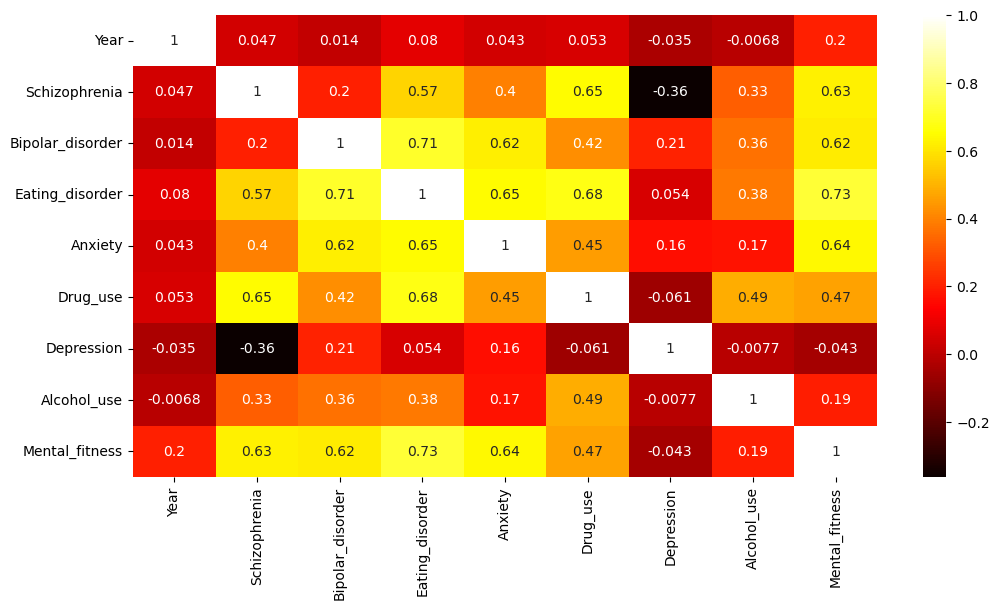

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='hot') #Heatmap is defined as a graphical representation of data using colors to visulize the value of the matrix.
plt.plot()

Takeaway Points: Eating_disorder is positively correleted to mental_fitness and vice-versa as our eating choice affect our mental health.

In [19]:
mean = df['Mental_fitness'].mean()
mean

4.8180618117506135

<Axes: xlabel='Depression', ylabel='Mental_fitness'>

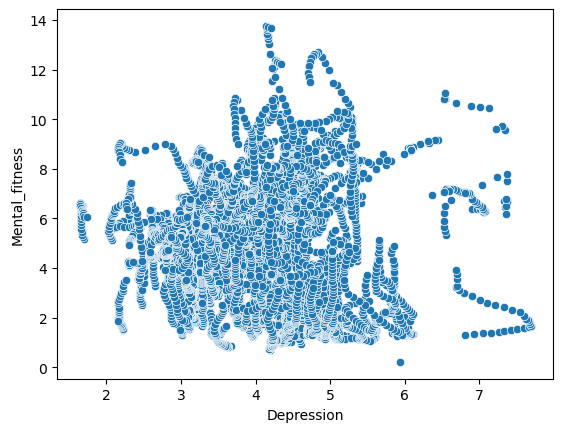

In [20]:
sns.scatterplot(x="Depression", y="Mental_fitness", data=df)

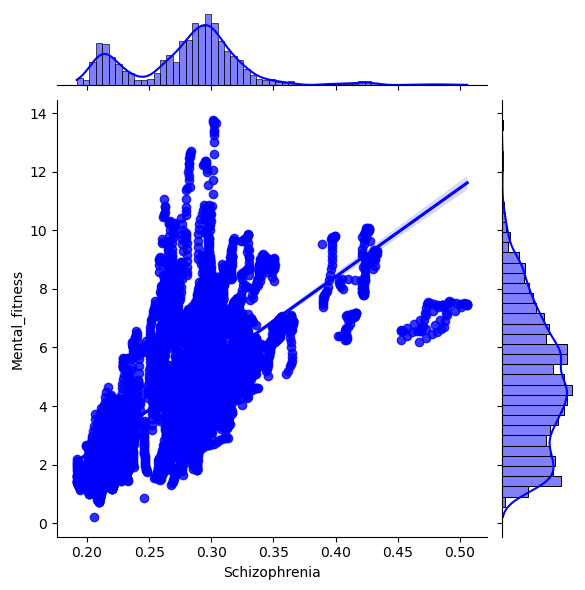

In [21]:
sns.jointplot(x='Schizophrenia',y='Mental_fitness',data=df,kind='reg',color='blue')
plt.show()

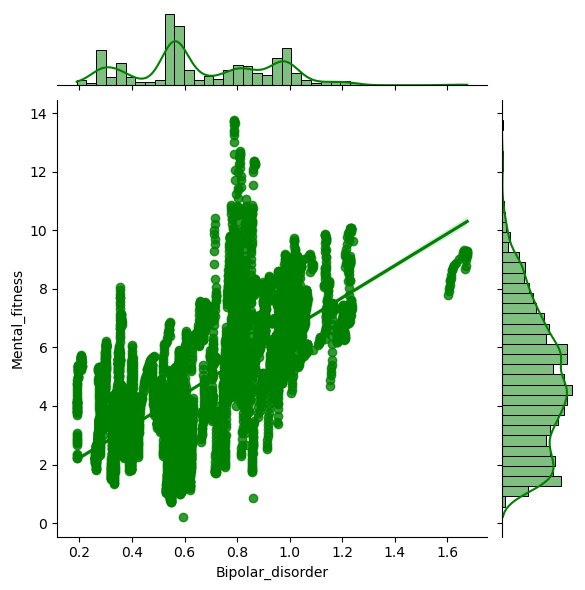

In [22]:
sns.jointplot(x='Bipolar_disorder',y='Mental_fitness',data=df,kind='reg',color='green')
plt.show()

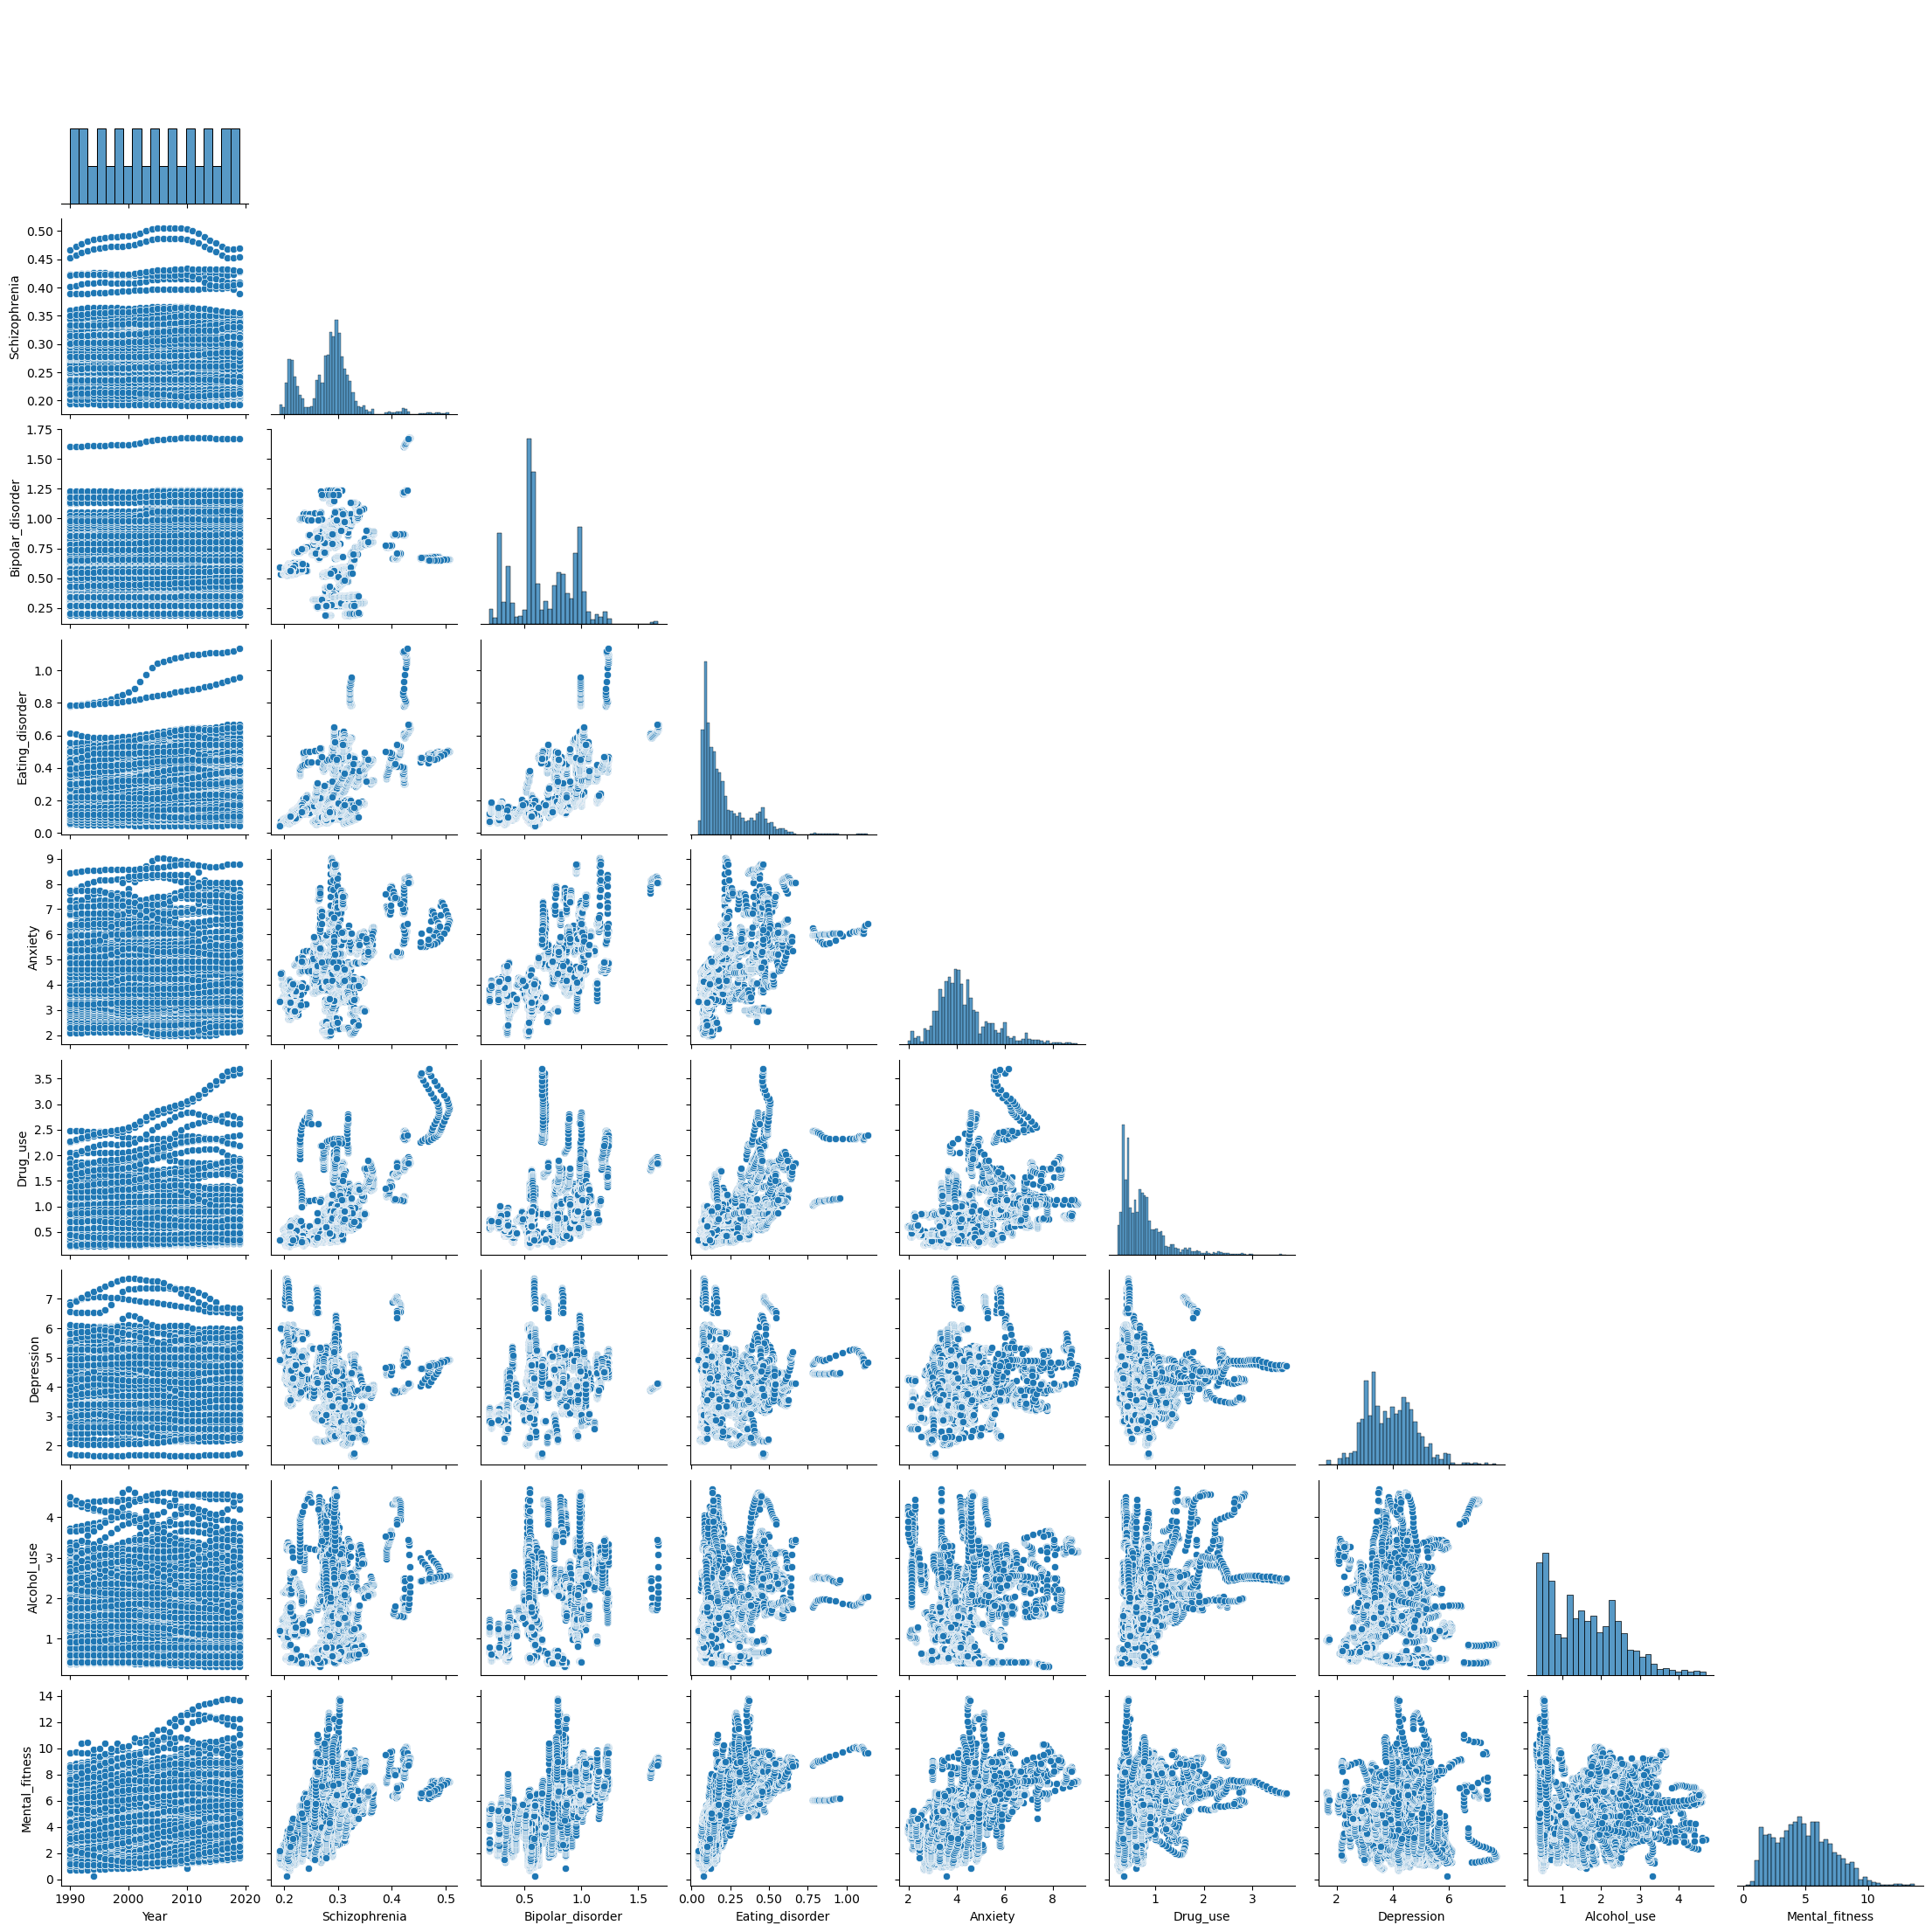

In [23]:
sns.pairplot(data=df,corner=True)         #Pairwise relationship in a dataset
plt.show()

In [24]:
mean=df['Mental_fitness'].mean()
mean

4.8180618117506135

In [25]:
df.max()

Country              Zimbabwe
Year                     2019
Schizophrenia        0.506018
Bipolar_disorder     1.676204
Eating_disorder      1.136541
Anxiety              9.015948
Drug_use             3.699504
Depression           7.688213
Alcohol_use          4.698694
Mental_fitness      13.761517
dtype: object

In [26]:
fig=px.pie(df, values='Mental_fitness', names='Year', title="Mental Health % Yearwise", hover_data=['Mental_fitness'], labels={'Mental_fitness':'Year'}, color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=1000, height=800)
fig.show()

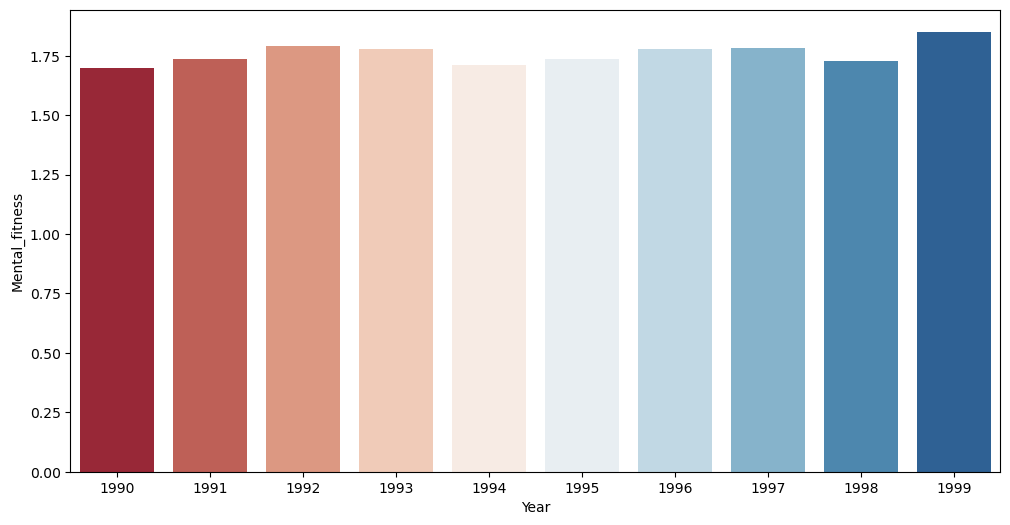

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(df.head(10),x='Year',y='Mental_fitness',color='Year',palette='RdBu')
plt.show()

In [28]:
#Yearwise variations in mental_fitness of different countries
fig = px.line(df, x='Year', y='Mental_fitness', markers=True, color='Country', symbol="Country")
fig.show()

#### Split dataset

In [29]:
X=df.drop(['Country','Mental_fitness'], axis=1)
y=df['Mental_fitness']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print("X_train : ", X_train.shape)
print("Y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (5472, 8)
Y_train :  (5472,)
X_test :  (1368, 8)
y_test :  (1368,)


## Model Training

### LinearRegression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [31]:
print(model1.intercept_)
print(model1.coef_)

-86.99210578146267
[ 0.04047479 26.41730913  3.46787314  3.3966452   0.28449692 -1.07808608
  0.07756415 -0.33890158]


### Model Evaluation

In [32]:
# model evaluation for training set
y_train_pred = model1.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 1.3483853548400893
RMSE is 1.1611999633310748
R2 score is 0.7443625591217292


The model performance for testing set
--------------------------------------
MSE is 1.3190171715430166
RMSE is 1.148484728476185
R2 score is 0.7468052570332424


#### Predictions from our Linear Regression Model

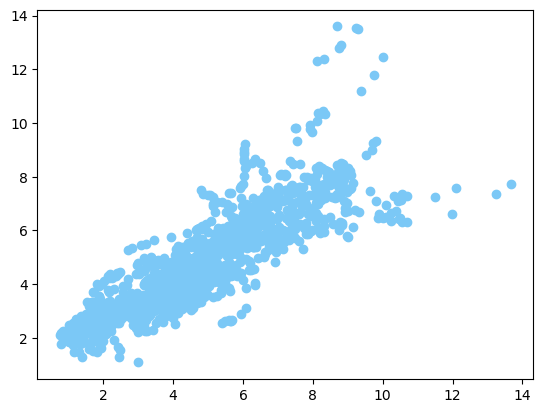

In [33]:
predictions = model1.predict(X_test)
plt.scatter(y_test,predictions, color='#7BC8F6')

In [34]:
Y_pred = model1.predict(X_test)
print("Accuracy Score for Test Dataset is ",model1.score(X_test, y_test)*100,"%")
print("Accuracy Score for Train Dataset is",model1.score(X_train,y_train)*100,"%")

Accuracy Score for Test Dataset is  74.68052570332424 %
Accuracy Score for Train Dataset is 74.43625591217292 %


In the above scatter plot, we see data is not in a proper line shape, which means our model has not done a good predictions.
Also, the accuracy is not upto the mark. So, We use a RandomForestRegressor model to get a good prediction.

### RANDOM FOREST REGRESSOR

In [35]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
# model evaluation for training set
y_train_pred = model2.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.004743068705206193
RMSE is 0.06886994050531911
R2 score is 0.9991007719407835


The model performance for testing set
--------------------------------------
MSE is 0.031270784349853704
RMSE is 0.17683547254398282
R2 score is 0.9939973501659816


### Regression Evaluation Metrics

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8401985869368742
MSE: 1.3190171715430166
RMSE: 1.148484728476185


#### Predictions from our Random Forest Regressor Model

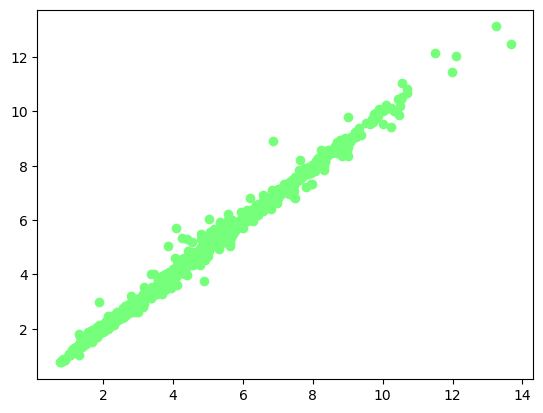

In [38]:
predictions = model2.predict(X_test)
plt.scatter(y_test,predictions, color='#76FF7B')

In the above scatter plot, we see data is in a proper line shape, which means our model has done a good predictions.

In [39]:
print("Accuracy Score for Test Dataset is ",model2.score(X_test, y_test)*100,"%")
print("Accuracy Score for Train Dataset is",model2.score(X_train,y_train)*100,"%")

Accuracy Score for Test Dataset is  99.39973501659816 %
Accuracy Score for Train Dataset is 99.91007719407835 %


now model has an accuracy of 99% which is very good and lets test it

## Testing

In [40]:
#We can create a DataFrame to display the actual and predicted mental fitness side by side
results = pd.DataFrame({'Actual Menta_fitness': y_test, 'Predicted Mental_fitness': predictions})
results = results.round(2)  # Round the data to two decimal places
print(results)

      Actual Menta_fitness  Predicted Mental_fitness
537                   4.70                      4.66
4398                  7.01                      6.97
5717                  5.99                      5.99
3584                  2.34                      2.33
605                   1.37                      1.39
...                    ...                       ...
2352                  6.02                      6.00
3084                  4.73                      4.73
4413                  5.71                      5.50
3702                  6.06                      6.06
4879                  3.24                      3.33

[1368 rows x 2 columns]


In [41]:
#geting our columns
print(df.columns)

Index(['Country', 'Year', 'Schizophrenia', 'Bipolar_disorder',
       'Eating_disorder', 'Anxiety', 'Drug_use', 'Depression', 'Alcohol_use',
       'Mental_fitness'],
      dtype='object')


In [42]:
def Tracker(Country, Year, Schizophrenia, Bipolar_disorder, Eating_disorder, Anxiety, Drug_use, Depression, Alcohol_use):
    x = np.array([ Year, Schizophrenia, Bipolar_disorder, Eating_disorder, Anxiety, Drug_use, Depression, Alcohol_use])
    prediction = model2.predict(x.reshape(1, -1))
    return prediction

In [43]:
from gradio import components as gr_components
name = gr_components.Textbox(label="Name of Country")
outputs = gr_components.Textbox(label="Mental Health Score")
app = gr.Interface(fn=Tracker, inputs=[name,'number','number','number','number','number','number','number','number'], outputs=outputs,description="This is an AI-Enabled Mental Health Tracker")

In [44]:
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://0917786b841c52d71b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Conclusion
* the model will predict the outcome "Mental fintess Score" based on factors 'Country, ''Year', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorder', 'Anxiety', 'Drug_use', 'Depression', 'Alcohol_use', 'Mental_fitness'.
* this multiple linear regression model is bulid using the Random Forest Regressor Model
* the model is predicting fine with an accuracy of 99 %.